__EDA-Indian Premier League 2008-2020__

__1. Problem Statement__<br><br>
This is IPL's data containing 2 datasets - __matches__ dataset gives details about the venues and players<br>
while __deliveries__ captures ball-by-ball stats over 13 years of the league (2008-2020)". 

__2. Importing Libraries__

In [1]:
import numpy as np       # linear algebra
import pandas as pd      # data processing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')

__3. Loading The Datasets__

In [2]:
#Reading 1st input file
deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [3]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

__info function__ gives us the following insights into the deliveries dataframe:<br>
1. There are a total of 193468 rows and 18 columns in the dataframe.<br>
2. There are 9 columns with a numeric datatype and 9 columns with an object datatype.<br>
3. There are missing values in the dismissal_kind,player_dismissed,fielder,extras_type and bowling_team columns.

In [4]:
#Reading 2nd input file
matches = pd.read_csv('matches.csv')
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

__info function__ gives us the following insights into the matches dataframe:<br>
1. There are a total of 816 rows and 17 columns in the dataframe.<br>
2. There are 3 columns with a numeric datatype and 14 columns with an object datatype.<br>
3. There are missing values in the city, player_of_match,winner,result,result_margin,eliminator, umpire1, umpire2 and method columns.

In [6]:
matches.id.is_unique

True

In [7]:
#since id is unique we can set this as our index
matches.set_index('id', inplace=True)

__4. Data Cleaning & Preprocessing__

<AxesSubplot:ylabel='id'>

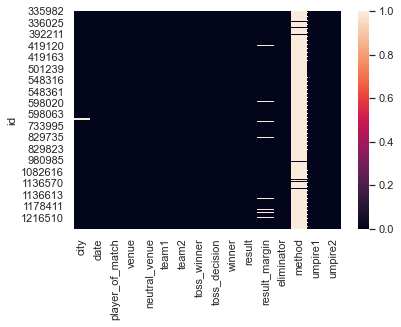

In [8]:
sns.heatmap(matches.isnull())   #shows missing values for ig method column

In [9]:
matches.isnull().sum()

city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

Will take each of the above observations and work on them to make the data ready for EDA<br>
1. winner, result & player of match have 4 missing value bcz the result is not given so we cannot filled this.<br>
2. result_margin have 17 NaN value bcz all 17 matches are tie so we ignored this.

In [10]:
#Filling in the missing values of city column
#First let's find the venues corresponding to which the values of city are empty
matches[matches.city.isnull()][['city','venue']]

,city,venue
id,,
729281,NaN,Sharjah Cricket Stadium
729287,NaN,Dubai International Cricket Stadium
729289,NaN,Dubai International Cricket Stadium
729291,NaN,Sharjah Cricket Stadium
729295,NaN,Sharjah Cricket Stadium
729297,NaN,Dubai International Cricket Stadium
729299,NaN,Sharjah Cricket Stadium
729301,NaN,Dubai International Cricket Stadium
729303,NaN,Dubai International Cricket Stadium


In [11]:
matches['city'].fillna(matches['venue'], inplace=True)

In [12]:
matches['city'].replace(to_replace = ['Sharjah Cricket Stadium']   , value = ['Sharjah'] , inplace = True)
matches['city'].replace(to_replace = ['Dubai International Cricket Stadium']   , value = ['Dubai'] , inplace = True)

In [13]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru'],
      dtype=object)

In [14]:
#method column has close to 90% missing values. hence dropping that column
matches = matches.drop('method', axis = 1)

In [15]:
matches.winner.value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [16]:
#team1, team2 and winner all 3 columns have rising pune supergiant as well as rising pune supergiants. 
# & 'Delhi Daredevils' & 'Delhi Capitals'
#so we can just keep one of the names

matches['winner'] = matches['winner'].replace('Delhi Daredevils','Delhi Capitals')
matches['team1'] = matches['team1'].replace('Delhi Daredevils','Delhi Capitals')
matches['team2'] = matches['team2'].replace('Delhi Daredevils','Delhi Capitals')

matches['winner'] = matches['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['team1'] = matches['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['team2'] = matches['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [17]:
city_venue = matches.groupby(['city','venue']).count()['date']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

date
city           venue                                                   
Abu Dhabi      Sheikh Zayed Stadium                                  29
Ahmedabad      Sardar Patel Stadium, Motera                          12
Bangalore      M Chinnaswamy Stadium                                 65
Bengaluru      M.Chinnaswamy Stadium                                 15
Bloemfontein   OUTsurance Oval                                        2
Cape Town      Newlands                                               7
Centurion      SuperSport Park                                       12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...    21
               Punjab Cricket Association Stadium, Mohali            35
Chennai        MA Chidambaram Stadium, Chepauk                       57
Cuttack        Barabati Stadium                                       7
Delhi          Feroz Shah Kotla                                      74
Dharamsala     Himachal Pradesh Cricket Association Stadium           9
Dubai          Dubai International Cricket Stadium                   33
Durban         Kingsmead                                             15
East London    Buffalo Park                                           3
Hyderabad      Rajiv Gandhi International Stadium, Uppal             64
Indore         Holkar Cricket Stadium                                 9
Jaipur         Sawai Mansingh Stadium                                47
Johannesburg   New Wanderers Stadium                                  8
Kanpur         Green Park                                             4
Kimberley      De Beers Diamond Oval                                  3
Kochi          Nehru Stadium                                          5
Kolkata        Eden Gardens                                          77
Mumbai         Brabourne Stadium                                     11
               Dr DY Patil Sports Academy                            17
               Wankhede Stadium                                      73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha           3
Port Elizabeth St George's Park                                       7
Pune           Maharashtra Cricket Association Stadium               21
               Subrata Roy Sahara Stadium                            17
Raipur         Shaheed Veer Narayan Singh International Stadium       6
Rajkot         Saurashtra Cricket Association Stadium                10
Ranchi         JSCA International Stadium Complex                     7
Sharjah        Sharjah Cricket Stadium                               18
Visakhapatnam  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...    13

__Observations__
Bengaluru and Bangalore both are in the data when they are same. So we need to keep one of them<br>
Chandigarh and Mohali are same and there is just one stadium Punjab Cricket Association IS Bindra Stadium,
will correct stadium name here.<br>
Mumbai :  3 venues used for IPL<br>
Pune :  2 venues for IPL<br>

In [18]:
matches['city'] = matches['city'].replace('Bangalore','Bengaluru')
matches['city'] = matches['city'].replace('Chandigarh','Mohali')
matches.venue = matches.venue.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association IS Bindra Stadium, Mohali')

In [19]:
print(matches.city.nunique())
print(matches.venue.nunique())

31
35


Here __matches__ dataset is usable for EDA now .<br>
we will perform Data Preprocessing on our deliveries dataset.

<AxesSubplot:>

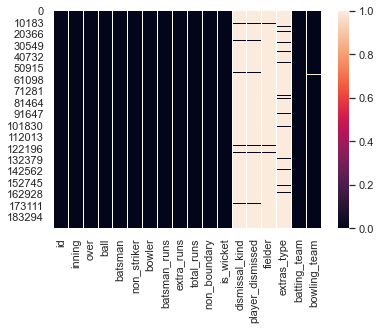

In [20]:
sns.heatmap(deliveries.isnull())

In [21]:
deliveries.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [22]:
#We will check the batting_team and bowling_team values

print(deliveries.batting_team.unique())
print(deliveries.bowling_team.unique())

['Kolkata Knight Riders' 'Royal Challengers Bangalore' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Delhi Daredevils'
 'Mumbai Indians' 'Deccan Chargers' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals']
['Royal Challengers Bangalore' 'Kolkata Knight Riders'
 'Chennai Super Kings' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' nan 'Sunrisers Hyderabad'
 'Rising Pune Supergiants' 'Gujarat Lions' 'Rising Pune Supergiant'
 'Delhi Capitals']


In [23]:
deliveries['batting_team'] = deliveries['batting_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
deliveries['batting_team'] = deliveries['batting_team'].replace('Delhi Daredevils','Delhi Capitals')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Delhi Daredevils','Delhi Capitals')


In [24]:
#merging the 2 datasets
merge_df = pd.merge(deliveries,matches, left_on='id', right_on ='id')
merge_df.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen


__5. Exploratory Data Analysis__<br>
EDA means analysis of dataset based on various numarical methods and graphical tools.<br>
So here we will take some important questions & will analyze & find pattern using visualization.<br>
Three types of EDA :
1. Univariate Analyis
2. Bivariate Analysis
3. Multivariate Analysis

__Q 1. How many matches were played each season in IPL? (Univariate Analyis)__

In [25]:
matches["season"] = matches["date"].apply(lambda x:x.split("-")[0])
matches['season'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [26]:
match_count = matches['season'].value_counts().sort_index()
match_count

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: season, dtype: int64

Text(0.5, 1.0, 'Number matches played each Season')

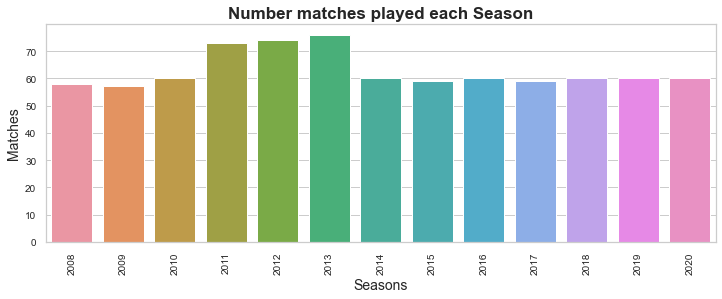

In [27]:
#Total matches played per season in a plot.
plt.figure(figsize=(12,4))
sns.countplot(matches['season']) #Plot countplot as it is.
plt.xticks(rotation = 90, fontsize = 10) #Stylize on X axis.
plt.yticks(fontsize = 10) #Stylize X axis.
plt.xlabel('Seasons', fontsize  = 14 ) #Stylize X header.
plt.ylabel('Matches', fontsize = 14) #Stylize X header.
plt.title('Number matches played each Season', fontsize = 17, fontweight = 'bold') #Add and stylize title.

2011-2013 have more matches being played than other seasons<br>
All other seasons have approximately 58-60 matches while 2011-2013 have more than 70 matches.

__Q.2 How many teams played in each season?(Univariate Analyis)__

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

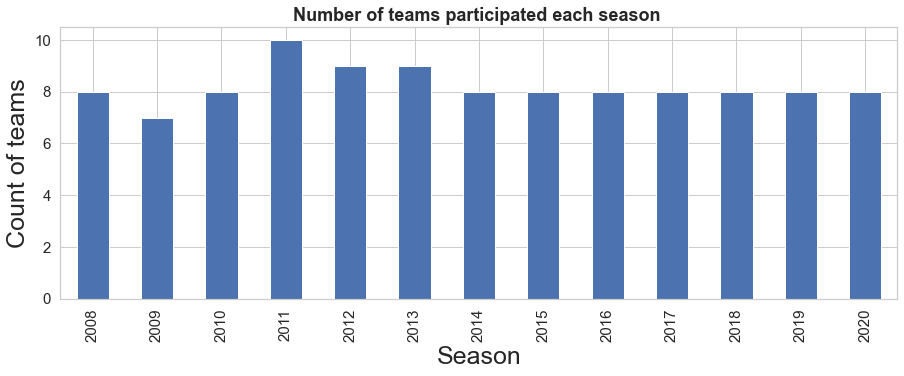

In [28]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

10 teams played in 2011 and 9 teams each in 2012 and 2013<br>
This explains why 2011-2013 have seen more matches being played than other seasons

__Q.3 How many matches were played by each team ?(Bivariate Analyis)__

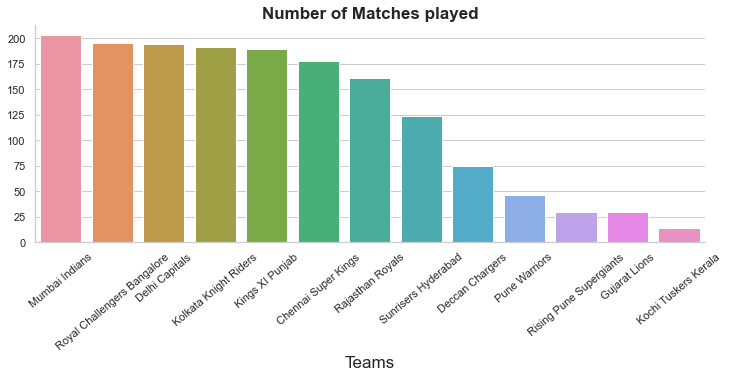

In [29]:
partial_count1 = matches['team1'].value_counts()
partial_count2 = matches['team2'].value_counts()
total_matches = np.add(partial_count1, partial_count2).sort_values(ascending = False)
plt.figure(figsize=(12,4))
sns.barplot(x = total_matches.index, y = total_matches.values)
sns.despine()
_ = plt.xticks(rotation = 40)
plt.title('Number of Matches played', fontsize = 17, fontweight = 'bold')
_ = plt.xlabel('Teams',fontsize = 17)

__Q 5. Which team has dominated IPL so far?(Univariate Analyis)__

In [30]:
#creating a dataframe with season and winner columns
winning_teams = matches[['season','winner']]

#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(0, 1, 'Chennai Super Kings'),
  Text(0, 2, 'Kolkata Knight Riders'),
  Text(0, 3, 'Sunrisers Hyderabad'),
  Text(0, 4, 'Rajasthan Royals'),
  Text(0, 5, 'Deccan Chargers')])

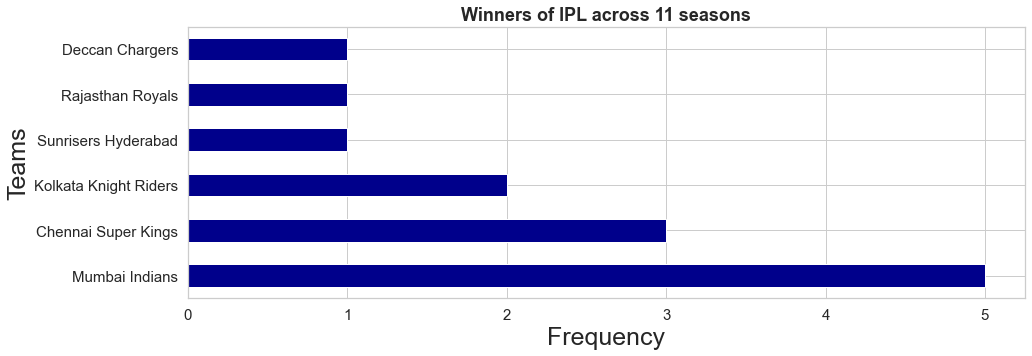

In [31]:
winners_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'darkblue')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

__Q 5. Top 20 venue which has hosted most number of IPL matches?(Univariate Analyis)__ 

In [32]:
venue_counts=matches.groupby('venue').apply(lambda x:x['venue'].count()).reset_index(name='Match Counts')
top_venues_order=venue_counts.sort_values(by='Match Counts',ascending=False)
top_venues=top_venues_order[:20]
print('Top 20 Stadiums with the maximum number of Matches Played:\n',top_venues)


Top 20 Stadiums with the maximum number of Matches Played:
                                                 venue  Match Counts
7                                        Eden Gardens            77
8                                    Feroz Shah Kotla            74
34                                   Wankhede Stadium            73
14                              M Chinnaswamy Stadium            65
23          Rajiv Gandhi International Stadium, Uppal            64
16                    MA Chidambaram Stadium, Chepauk            57
22  Punjab Cricket Association IS Bindra Stadium, ...            56
26                             Sawai Mansingh Stadium            47
6                 Dubai International Cricket Stadium            33
29                               Sheikh Zayed Stadium            29
17            Maharashtra Cricket Association Stadium            21
28                            Sharjah Cricket Stadium            18
4                          Dr DY Patil Sports Academy   

Text(0.5, 1.0, 'Top Stadiums that have hosted IPL Matches')

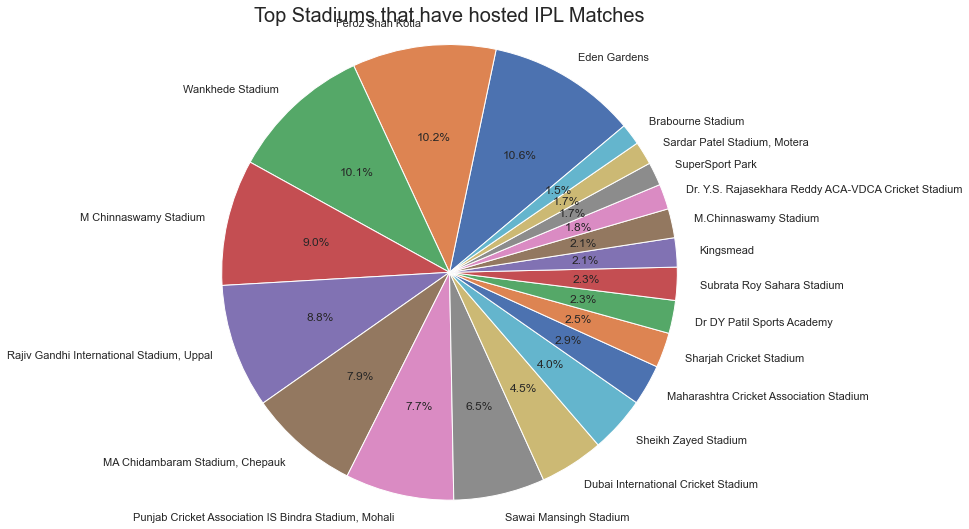

In [33]:
plt.figure(figsize=(9,9))
plt.pie(top_venues['Match Counts'],labels=top_venues['venue'],autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.title('Top Stadiums that have hosted IPL Matches',size=20)

__Q 6. Top 10 Batsmen in all 13 IPL season (Bivariant Analysis)__

In [49]:
batting_tot=deliveries.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 
print('The Top 10 Batsmen in thr Tournament are:\n',top_batsmen)
fig = px.bar(top_batsmen, x='batsman', y='Runs',
             hover_data=['batsman'], color='Runs',title='Top 10 Batsmen in IPL- Seasons 2008-2020')
fig.show()



The Top 10 Batsmen in thr Tournament are:
             batsman  Runs
505         V Kohli  5878
438        SK Raina  5368
116       DA Warner  5254
379       RG Sharma  5230
407        S Dhawan  5197
24   AB de Villiers  4849
96         CH Gayle  4772
301        MS Dhoni  4632
398      RV Uthappa  4607
154       G Gambhir  4217


__Q 7. Top 10 Bowler in all 13 IPL season (Bivariant Analysis)__

In [35]:
#Run Out is not considered as a wicket in the Bowler's account- hence we shall be removing them first
bowling_wickets=deliveries[deliveries['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
print('The Top Wicket Takers in the Tournament are:\n',top_bowlers)
fig = px.bar(top_bowlers, x='bowler', y='Wickets',
             hover_data=['bowler'], color='Wickets',title='Top 10 Bowlers in IPL- Seasons 2008-2020')
fig.show()

The Top Wicket Takers in the Tournament are:
               bowler  Wickets
297       SL Malinga      170
5           A Mishra      160
235        PP Chawla      156
85          DJ Bravo      153
115  Harbhajan Singh      150
240         R Ashwin      138
50           B Kumar      136
304        SP Narine      127
357        YS Chahal      121
338         UT Yadav      119


__Q 8. Top 10 Fielder in all 13 IPL season (Bivariant Analysis)__

In [36]:
#Creating a list of the best fielders- Considering Catch,Run Out and Stumpings
fielder_list=deliveries.groupby('fielder').apply(lambda x:x).dropna().reset_index()
fielder_list_count=fielder_list.groupby('fielder').count()
fielder_list_counts=fielder_list_count['dismissal_kind'].reset_index(name='Dismissals')
fielder_list_max=fielder_list_counts.sort_values(by='Dismissals',ascending=False)
top_fielders=fielder_list_max[0:10]
print('The Best Fielders(and WicketKeepers) in the Torunament are:\n',top_fielders)

fig = px.bar(top_fielders, x='fielder', y='Dismissals',
             hover_data=['fielder'], color='Dismissals',title='Top 10 Fielders in IPL- Seasons 2008-2019')
fig.show()

The Best Fielders(and WicketKeepers) in the Torunament are:
                 fielder  Dismissals
11           KD Karthik           4
15             MS Dhoni           4
20             PA Patel           3
0          AC Gilchrist           2
23            SV Samson           2
25          YV Takawale           2
6   DW Steyn,MV Boucher           1
7          Ishan Kishan           1
24              WP Saha           1
2             AT Rayudu           1


__Q 9. Top 10 MOM award in all 13 IPL season (Univariant Analysis)__

Text(0.5, 1.0, 'Most MoM winner')

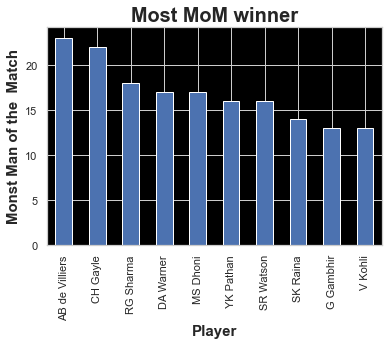

In [37]:
#Drow a bar chart for top 10 most MOM award winners.
ax = plt.axes()
ax.set(facecolor = 'Black')
matches.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xlabel('Player', fontsize = 15, fontweight = 'bold')
plt.ylabel('Monst Man of the  Match', fontsize = 15, fontweight = 'bold')
plt.title('Most MoM winner', fontsize = 20, fontweight = 'bold')

__Q 10. Top 10 Umpire in all 13 IPL season (Bivariant Analysis)__

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'S Ravi'),
  Text(0, 1, 'HDPK Dharmasena'),
  Text(0, 2, 'AK Chaudhary'),
  Text(0, 3, 'C Shamshuddin'),
  Text(0, 4, 'M Erasmus'),
  Text(0, 5, 'CK Nandan'),
  Text(0, 6, 'Nitin Menon'),
  Text(0, 7, 'SJA Taufel'),
  Text(0, 8, 'Asad Rauf'),
  Text(0, 9, 'VA Kulkarni')])

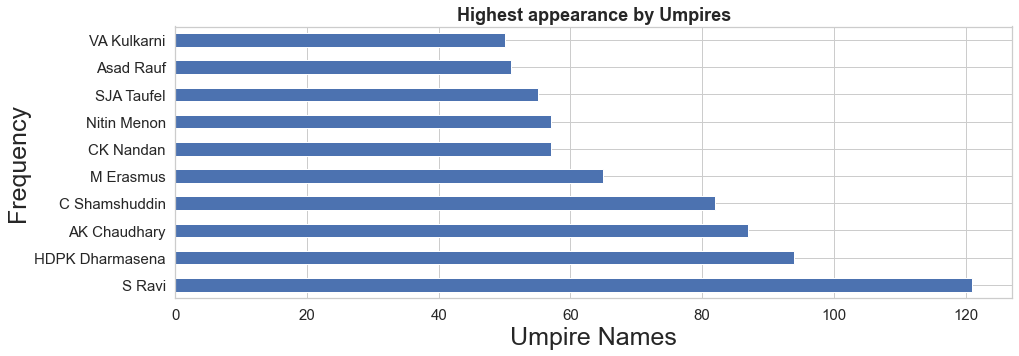

In [38]:
#A simple concatenation of 2 umpire columns will give us the total number of matches that each umpire has umpired
umpire_total = pd.concat([matches.umpire1,matches.umpire2], ignore_index=True)
umpire_total = pd.DataFrame(umpire_total, columns = ['umpire_name'])

umpire_total['umpire_name'].value_counts().head(10).plot(kind = 'barh', figsize = (15,5))
plt.title("Highest appearance by Umpires",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Umpire Names", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

__Q.11 How many matches were played by each team & how many wins ?(Bivariate Analyis)__

In [39]:
matches_played=pd.concat([matches['team1'],matches['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=matches['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)
totm = matches_played.reset_index()

In [40]:
trace = go.Table(
    header=dict(values=["Team","Total Matches","Wins"],
                fill = dict(color='#ff96ea'),
                font = dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                align = ['center'],
               height = 30),
    cells=dict(values=[totm['Team'], totm['Total Matches'], totm['wins']],
               fill = dict(color=['rgb(235, 193, 238)', 'rgba(228, 222, 249, 0.65)']),
               align = ['center'], font_size=13, height=25))

layout = dict(
    width=850,
    height=620,
    autosize=False,
    title='Total Matches vs Wins per team',
    margin = dict(t=100),
    showlegend=False,    
)
fig1 = dict(data=[trace], layout=layout)
iplot(fig1)

__Q. 12 Do teams bat first or second after winning toss?(Bivariate Analyis)__


Text(0, 0.5, 'Count')

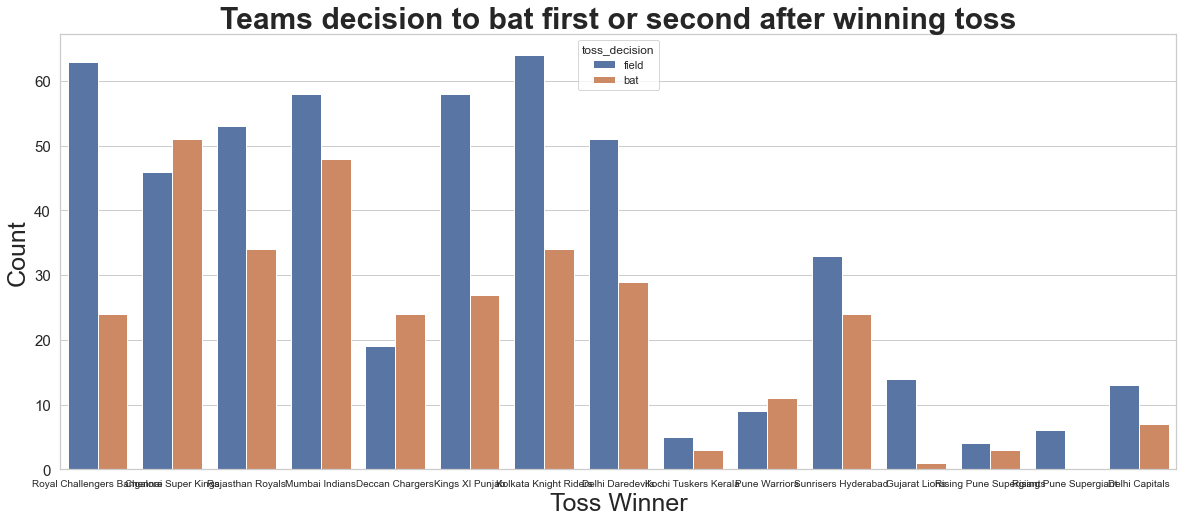

In [44]:
plt.figure(figsize = (20,8))
sns.countplot('toss_winner', data = matches, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.xticks(size = 10)
plt.yticks(size = 15)
plt.xlabel("Toss Winner", size = 25)
plt.ylabel("Count", size = 25)

__Q. 13 How toss decision affects match results?(Bivariate Analyis)__

Text(0, 0.5, 'Frequency')

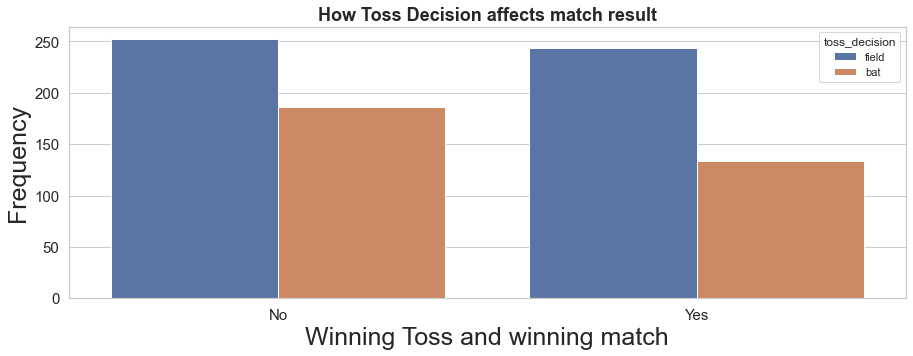

In [42]:
matches['toss_win_game_win'] = np.where((matches.toss_winner == matches.winner),'Yes','No')
plt.figure(figsize = (15,5))
sns.countplot('toss_win_game_win', data=matches, hue = 'toss_decision')
plt.title("How Toss Decision affects match result", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss and winning match", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)